# Molecular Modelling Exercises

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Reading in files the easy way

For standard formats such as `csv` one can make use of the rich python ecosystem by using third party libraries such as `pandas`.

To have access to code from the pandas library we need to import the module. In the python community it is convention to abbreviate pandas as `pd`.
Then we can make use of the pandas function `read_csv`.

In [3]:
import pandas as pd

In [4]:
tips = pd.read_csv('tips.csv', header=0, index_col=0)
tips.head()  # .head() only display the first few elements

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The data read in this way will be stored in a so-called `DataFrame`.
With the keyword arguments `header=0`, `index_col=0` we specify that the first column and first row of the CSV file should be used as columns and indeces. Without that both would just be numbered sequentially. If we want to rename some columns, we can do it like shown below.

In [5]:
tips = tips.rename(columns={'total_bill': 'total_bill_dollar', 'tip': 'tip_dollar'})
tips.head()

,total_bill_dollar,tip_dollar,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


If we want to select a column, we can access it like a dictionary, this returns a `Series`. If we want to access multiple columns at once we have to give it a list of values instead of a single column name, this returns a `DataFrame`.

In [6]:
tips['total_bill_dollar'].head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill_dollar, dtype: float64

In [7]:
tips[['total_bill_dollar', 'tip_dollar']].head()

,total_bill_dollar,tip_dollar
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


We can even perform calculations between the individual columns of the `DataFrame` and assign it to new columns in the `DataFrame`.

In [8]:
tips['total_bill_cents'] = tips['total_bill_dollar'] * 100
tips['tip_cents'] = tips['tip_dollar'] * 100
tips['tip_percentage'] = tips['tip_cents'] / tips['total_bill_cents'] * 100

tips.tail()  # .tail() only display the last few elements

,total_bill_dollar,tip_dollar,sex,smoker,day,time,size,total_bill_cents,tip_cents,tip_percentage
239,29.03,5.92,Male,No,Sat,Dinner,3,2903.0,592.0,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2718.0,200.0,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2267.0,200.0,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,1782.0,175.0,9.820426
243,18.78,3.00,Female,No,Thur,Dinner,2,1878.0,300.0,15.974441


We have already seen earlier that calculating with floats can be imprecise, therefore, we want to circumvent this by changing the datatype from float to int.

In [9]:
tips['total_bill_cents'] = tips['total_bill_cents'].astype(int)
tips['tip_cents'] = tips['tip_cents'].astype(int)

tips.head()

,total_bill_dollar,tip_dollar,sex,smoker,day,time,size,total_bill_cents,tip_cents,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,1698,101,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,1034,166,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,2101,350,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,2368,331,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,2459,361,14.680765


`pandas` offers many more features that can make data analysis a breeze, so you may want to have a look at their documentation (https://pandas.pydata.org/docs/user_guide/index.html#user-guide) for many more useful functions.

In [10]:
tips.describe()

,total_bill_dollar,tip_dollar,size,total_bill_cents,tip_cents,tip_percentage
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,1978.520492,299.795082,16.080258
std,8.902412,1.383638,0.951100,890.232172,138.378644,6.107220
min,3.070000,1.000000,1.000000,307.000000,100.000000,3.563814
25%,13.347500,2.000000,2.000000,1334.750000,200.000000,12.912736
50%,17.795000,2.900000,2.000000,1779.000000,290.000000,15.476977
75%,24.127500,3.562500,3.000000,2412.750000,356.250000,19.147549
max,50.810000,10.000000,6.000000,5081.000000,1000.000000,71.034483


# Applying functions to a DataFrame column
If we want to `apply` a function to a column we can use the `.apply(function)` method of `DataFrame` and `Series`.

In [11]:
def to_euro(dollar, rate):
    return dollar*rate

In [12]:
tips['total_bill_euro'] = tips['total_bill_dollar'].apply(to_euro, rate=0.93)
tips['tip_euro'] = tips['tip_dollar'].apply(to_euro, rate=0.93)

tips.head()

,total_bill_dollar,tip_dollar,sex,smoker,day,time,size,total_bill_cents,tip_cents,tip_percentage,total_bill_euro,tip_euro
0,16.99,1.01,Female,No,Sun,Dinner,2,1698,101,5.944673,15.8007,0.9393
1,10.34,1.66,Male,No,Sun,Dinner,3,1034,166,16.054159,9.6162,1.5438
2,21.01,3.50,Male,No,Sun,Dinner,3,2101,350,16.658734,19.5393,3.2550
3,23.68,3.31,Male,No,Sun,Dinner,2,2368,331,13.978041,22.0224,3.0783
4,24.59,3.61,Female,No,Sun,Dinner,4,2459,361,14.680765,22.8687,3.3573


In [13]:
values = []
for val in tips['total_bill_dollar']:
    values.append(to_euro(val, rate=0.93))

tips['total_bill_euro_for'] = values
tips

,total_bill_dollar,tip_dollar,sex,smoker,day,time,size,total_bill_cents,tip_cents,tip_percentage,total_bill_euro,tip_euro,total_bill_euro_for
0,16.99,1.01,Female,No,Sun,Dinner,2,1698,101,5.944673,15.8007,0.9393,15.8007
1,10.34,1.66,Male,No,Sun,Dinner,3,1034,166,16.054159,9.6162,1.5438,9.6162
2,21.01,3.50,Male,No,Sun,Dinner,3,2101,350,16.658734,19.5393,3.2550,19.5393
3,23.68,3.31,Male,No,Sun,Dinner,2,2368,331,13.978041,22.0224,3.0783,22.0224
4,24.59,3.61,Female,No,Sun,Dinner,4,2459,361,14.680765,22.8687,3.3573,22.8687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2903,592,20.392697,26.9979,5.5056,26.9979
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2718,200,7.358352,25.2774,1.8600,25.2774
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2267,200,8.822232,21.0831,1.8600,21.0831
242,17.82,1.75,Male,No,Sat,Dinner,2,1782,175,9.820426,16.5726,1.6275,16.5726


# Plotting 
## from a DataFrame

To analyze data, tables can be handy, but for more complex data, this can get messy soon. For this, visualizing the data in plots is an important skill.

Pandas provides many tools out of the box to visualize the data straight out of the box (https://pandas.pydata.org/docs/user_guide/visualization.html).

In [14]:
import matplotlib.pyplot as plt

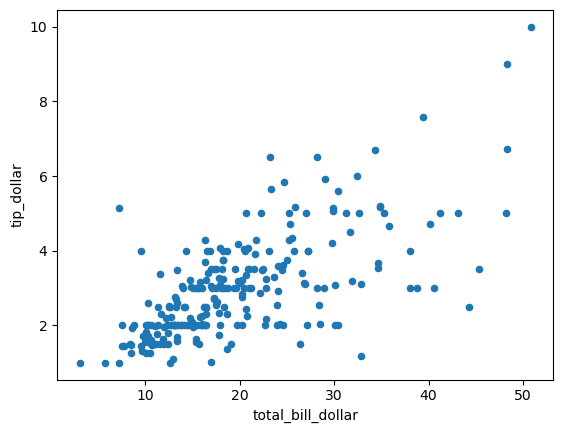

In [15]:
tips.plot(kind='scatter', x='total_bill_dollar', y='tip_dollar')

plt.show()

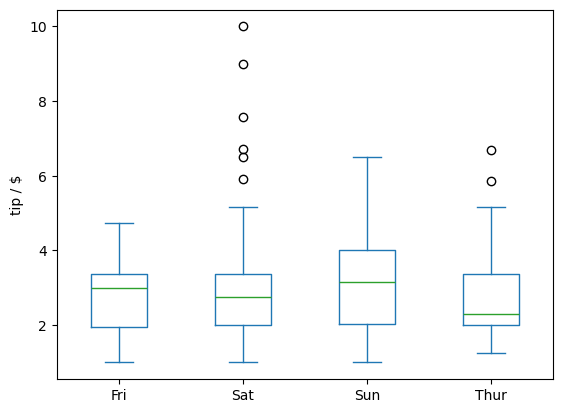

In [16]:
ax = tips[['tip_dollar', 'day']].pivot(columns='day').droplevel(0, axis=1).plot(kind='box')
ax.set_ylabel('tip / $')
plt.show()

## explicitly


We will once again make use of the rich python ecosystem and use the libraries `matplotlib` and `seaborn`.
We imported the module `pyplot` abbreviated as `plt` and now import `seaborn` as `sns`.

Below are some basic plot types and how you can create them with matplotlib.

In [17]:
import seaborn as sns

### seaborn

Many complex statistical plots are already available from the package `seaborn`, for more examples take a look at https://seaborn.pydata.org/examples/index.html

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

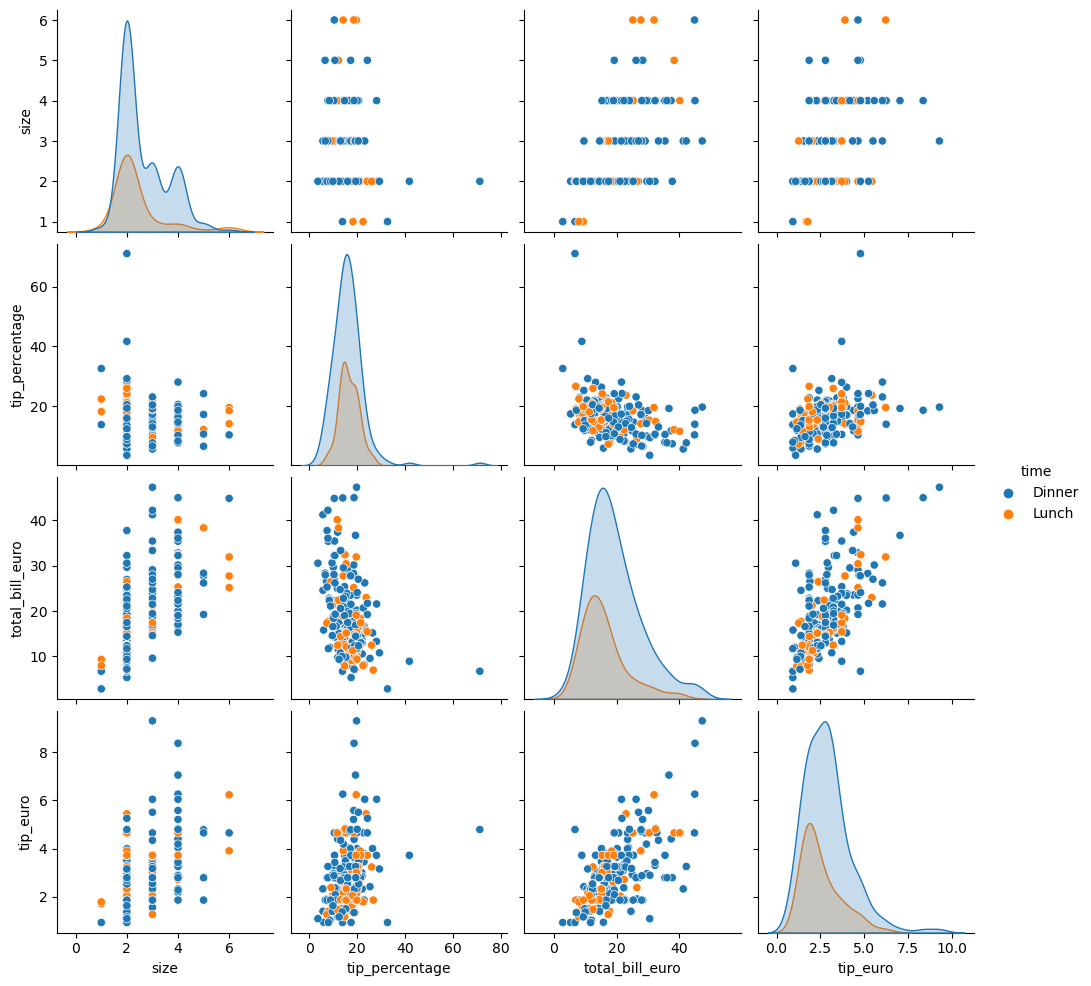

In [18]:
sns.pairplot(tips.drop(columns=['total_bill_dollar', 'total_bill_cents', 'tip_dollar', 'tip_cents', 'total_bill_euro_for']), hue='time')
plt.show()

### matplotlib

All of the above mentioned ways to plot data are based on the module `matplotlib`, meaning they use it behind the scenes.
Sometimes when you want to modify the plots from above, you have to do it using `matplotlib` explicitly.

Below are some basic plot types and how you can create them with matplotlib, the matplotlib documentation, once again, can come in handy (https://matplotlib.org/stable/tutorials/index).

#### Bar chart

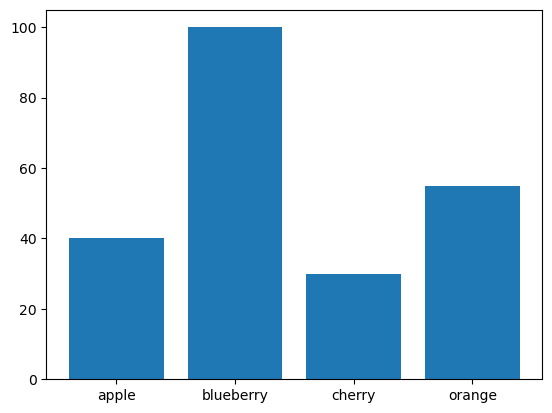

In [19]:
counts = [40, 100, 30, 55]
labels = ['apple', 'blueberry', 'cherry', 'orange']

plt.bar(labels, counts)
plt.show()

#### Pie chart

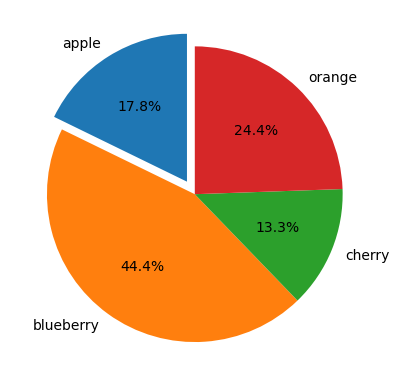

In [20]:
pie = plt.pie(x=counts, labels=labels, 
              explode=(0.1, 0, 0, 0), 
              startangle=90, 
              autopct='%1.1f%%',  # displaying and formatting the percentage inside the piece of pie
             )
plt.show()

#### Scatter plot

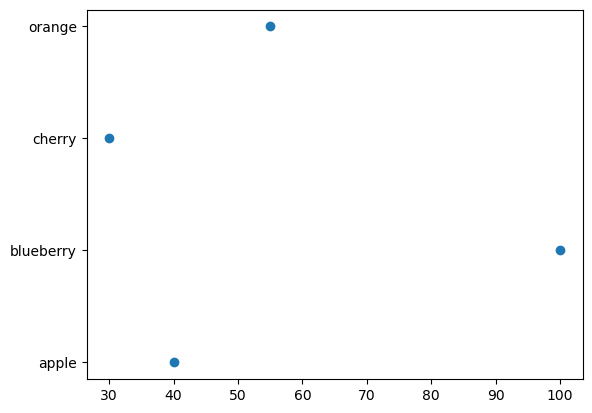

In [21]:
plt.scatter(counts, labels)
plt.show()

#### Line plot

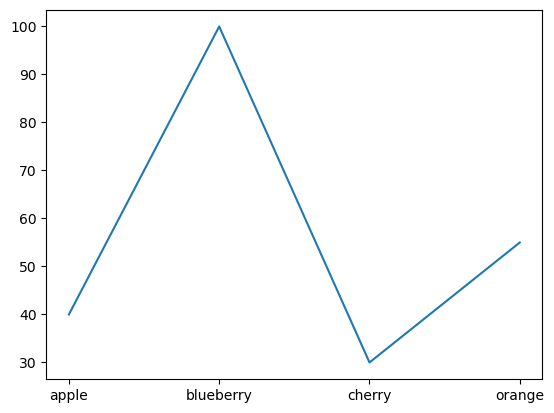

In [22]:
plt.plot(labels, counts)
plt.show()

### Plotting the data read in with Pandas and Matplotlib

To visualize our data, we can again use Matplotlib as before.

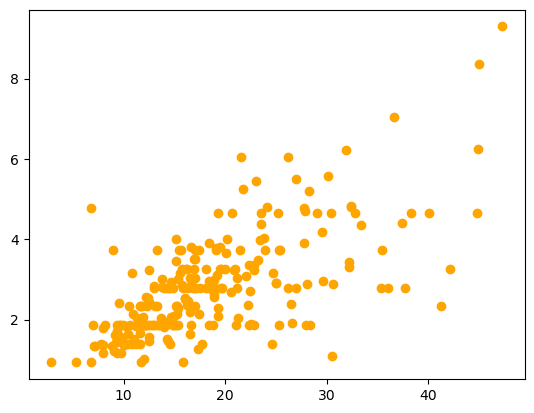

In [23]:
# as line plot
plt.scatter(tips['total_bill_euro'], tips['tip_euro'], color='orange')
plt.show()

Don't be intimidated by the code below!

In line 1 we create a figure and an axis on which we are going to plot. So now instead of functions from `plt` as before, we use methods that are associated to the `ax` object.

The lines starting from line 15 add a legend, extra axis labels and a title.

The last line which is commented out, can save the plot to a filename specified.

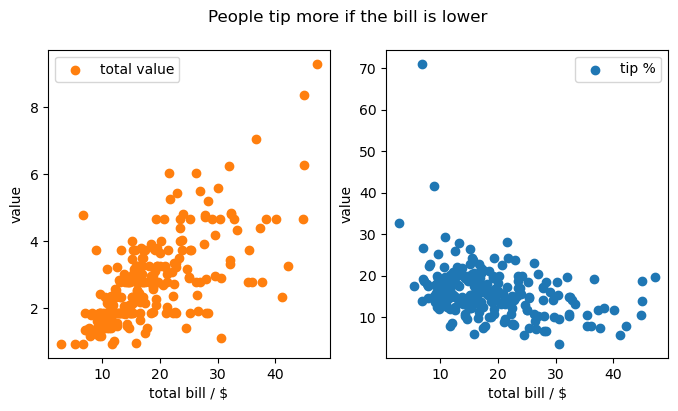

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

ax1.scatter(tips['total_bill_euro'], tips['tip_euro'],
           color='tab:orange',
           label = 'total value',
           )

ax2.scatter(
    tips['total_bill_euro'], tips['tip_percentage'],
    color='tab:blue',  # so its easily distinguishable, we choose a different color
    label = 'tip %'  # and add a label for a legend
)

for ax in (ax1, ax2):
    ax.legend()  # this way we can have a legend with the labels we added in the plotting functions before
    ax.set_xlabel('total bill / $')
    ax.set_ylabel('value')
fig.suptitle('People tip more if the bill is lower')

# fig.savefig('tipping.png')
plt.show()

For many examples showcasing different kind of plots, the matplotlib website (https://matplotlib.org/) can be of great use.

# Exercise

Recall the function you wrote to calculate the grades.
You have data from an online exam where 300 people took part and need to do the following tasks for your supervisor:

- read in the data from the file `exam_results.csv`
- compute the average and median score
- assign grades to each student using your function from 3_collections.py
- visualize the exam results in a bar or pie chart

## reading in the data

- Take a look at the csv file and see what characters are seperating the values.
- Take a look at the `read_csv` function in the pandas documentation to check how one can deal with multiple seperators

In [30]:
exam_results = pd.read_csv("exam_results.csv",sep=",")
print(exam_results)



     student_id   points
0             1  17.0/24
1             2  12.0/24
2             3  13.0/24
3             4  17.0/24
4             5  17.0/24
..          ...      ...
305         306  16.0/24
306         307  20.0/24
307         308  12.5/24
308         309  14.5/24
309         310  13.5/24

[310 rows x 2 columns]


## compute the average and median score

You can also use pandas to tackle these tasks! Check out the user guide!

In [31]:
def average(values):
    # YOUR CODE HERE
    raise NotImplementedError()
    return avg_value

In [32]:
assert average([1,2,3]) == 2
assert average([1,2,3,4]) == 2.5
assert average([4,1,3,2]) == 2.5

NotImplementedError: 

In [ ]:
def median(values):
    # YOUR CODE HERE
    raise NotImplementedError()
    return median_value

In [ ]:
assert median([1,2,3]) == 2
assert median([1,2,3,4]) == 2.5
assert median([4,1,3,2]) == 2.5

## calculate grades

To assign the grades we use the function we wrote in the previous notebook. Again, the function assigns a grade based on the points that a student received for a test.

The grade should be assigned based on these criterions:
- 1: above 87.5% 
- 2: 75-87.5%
- 3: 62.5-75%
- 4: 50-62.5%
- 5: below 50%

In [ ]:
def calculate_grade(achieved_points, total_points=24):
    # YOUR CODE HERE
    raise NotImplementedError()
    return grade

In [ ]:
assert calculate_grade(24, 24) == 1
assert calculate_grade(87.5, 100) == 1
assert calculate_grade(9, 10) == 1
assert calculate_grade(8, 10) == 2
assert calculate_grade(5, 10) == 4

## assign grades to each student

Create an additional column named `grades` in the exam results dataframe that contains the grade for each student.

Calculate the average and median scores.

In [ ]:
exam_results['grades'] = ...
median_grade = ...
average_grade = ...

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert (median_grade > 0) and (median_grade <= 5)
assert (average_grade > 0) and (average_grade <= 5)

## visualize the results of the exam using two different plots 
e.g. bar/pie plots..

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()